#**For Text Mining assignment**

##### **Task One:**

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

##### **Task Two:**
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [ ]:
musk = pd.read_csv('Elon_musk.csv', encoding = 'latin-1' , error_bad_lines = False)
musk

<ipython-input-2-b7c1a78ea208>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  musk = pd.read_csv('Elon_musk.csv', encoding = 'latin-1' , error_bad_lines = False)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
musk.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [ ]:
musk.drop(['Unnamed: 0'], inplace= True, axis= 1)
musk

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
musk = [x.strip() for x in musk.Text] # remove both the leading and the trailing characters
musk = [Text for Text in musk if Text] # removes empty strings, because they are considered in Python as False
musk = [Text for Text in musk if not (Text.startswith('@') or 'https://' in Text or '<U' in Text )]

In [ ]:
musk[0:15] 

['The most entertaining outcome is the most likely',
 'Just agree to do Clubhouse with @kanyewest',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 'Back to work I go',
 'Hodl the rainforests!!',
 'Lessons learned',
 'Of Earth and Mars',
 'Time to tell the story of Tesla &amp; SpaceX',
 'The great thing about restaurants is that you get to hang out with strangers! - SJM',
 'The future currency of Earth',
 'Much wow!',
 'RT @SpaceX: Falcon 9 will launch @NASA\x92s SPHEREx mission \x96 which will collect data on more than 300 million galaxies and explore how the un',
 'I am become meme,\nDestroyer of shorts',
 'Sandstorm is a masterpiece',
 'Low-key Loki']

In [ ]:
# Joining the list into one string/text
elon = " ".join(musk)
elon

'The most entertaining outcome is the most likely Just agree to do Clubhouse with @kanyewest Bought some Dogecoin for lil X, so he can be a toddler hodler Back to work I go Hodl the rainforests!! Lessons learned Of Earth and Mars Time to tell the story of Tesla &amp; SpaceX The great thing about restaurants is that you get to hang out with strangers! - SJM The future currency of Earth Much wow! RT @SpaceX: Falcon 9 will launch @NASA\x92s SPHEREx mission \x96 which will collect data on more than 300 million galaxies and explore how the un I am become meme,\nDestroyer of shorts Sandstorm is a masterpiece Low-key Loki No highs, no lows, only Doge No need to be a gigachad to own Dogecoin is the people\x92s crypto Doge Off Twitter for a while It will be filled with graffiti art RT @SpaceX: This mission enables access for everyday people who dream of going to space If you\x92ve worked on advanced wearables, phones or robots, those skills are needed @neuralink Feels weird helping make (hopefu

In [ ]:
#Punctuation
no_punc_text = elon.translate(str.maketrans("", "", string.punctuation))
no_punc_text

'The most entertaining outcome is the most likely Just agree to do Clubhouse with kanyewest Bought some Dogecoin for lil X so he can be a toddler hodler Back to work I go Hodl the rainforests Lessons learned Of Earth and Mars Time to tell the story of Tesla amp SpaceX The great thing about restaurants is that you get to hang out with strangers  SJM The future currency of Earth Much wow RT SpaceX Falcon 9 will launch NASA\x92s SPHEREx mission \x96 which will collect data on more than 300 million galaxies and explore how the un I am become meme\nDestroyer of shorts Sandstorm is a masterpiece Lowkey Loki No highs no lows only Doge No need to be a gigachad to own Dogecoin is the people\x92s crypto Doge Off Twitter for a while It will be filled with graffiti art RT SpaceX This mission enables access for everyday people who dream of going to space If you\x92ve worked on advanced wearables phones or robots those skills are needed neuralink Feels weird helping make hopefully good version of Cy

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:70])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'Back', 'to', 'work', 'I', 'go', 'Hodl', 'the', 'rainforests', 'Lessons', 'learned', 'Of', 'Earth', 'and', 'Mars', 'Time', 'to', 'tell', 'the', 'story', 'of', 'Tesla', 'amp', 'SpaceX', 'The', 'great', 'thing', 'about', 'restaurants', 'is', 'that', 'you', 'get', 'to', 'hang', 'out', 'with', 'strangers', 'SJM', 'The', 'future', 'currency', 'of']


In [ ]:
len(text_tokens) 

2560

In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('is,have,an,on,with,to')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:70]) 

['The', 'entertaining', 'outcome', 'likely', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'Back', 'work', 'I', 'go', 'Hodl', 'rainforests', 'Lessons', 'learned', 'Of', 'Earth', 'Mars', 'Time', 'tell', 'story', 'Tesla', 'amp', 'SpaceX', 'The', 'great', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'SJM', 'The', 'future', 'currency', 'Earth', 'Much', 'wow', 'RT', 'SpaceX', 'Falcon', '9', 'launch', 'NASA\x92s', 'SPHEREx', 'mission', '\x96', 'collect', 'data', '300', 'million', 'galaxies', 'explore', 'un', 'I', 'become', 'meme', 'Destroyer', 'shorts', 'Sandstorm', 'masterpiece', 'Lowkey', 'Loki']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Noramalize the data and converting in lower case
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:35]) 

['the', 'entertaining', 'outcome', 'likely', 'just', 'agree', 'clubhouse', 'kanyewest', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'back', 'work', 'i', 'go', 'hodl', 'rainforests', 'lessons', 'learned', 'of', 'earth', 'mars', 'time', 'tell', 'story', 'tesla', 'amp', 'spacex', 'the', 'great', 'thing', 'restaurants']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['the', 'entertain', 'outcom', 'like', 'just', 'agre', 'clubhous', 'kanyewest', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'back', 'work', 'i', 'go', 'hodl', 'rainforest', 'lesson', 'learn', 'of', 'earth', 'mar', 'time', 'tell', 'stori', 'tesla', 'amp', 'spacex', 'the', 'great', 'thing', 'restaur', 'get', 'hang', 'stranger', 'sjm', 'the']


In [ ]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')  

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

The entertaining outcome likely Just agree Clubhouse kanyewest Bought Dogecoin lil X toddler hodler Back work I go Hodl rainforests Lessons learned Of Earth Mars Time tell story Tesla amp SpaceX The great thing restaurants get hang strangers SJM The


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['the', 'entertaining', 'outcome', 'likely', 'just', 'agree', 'Clubhouse', 'kanyewest', 'buy', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'back', 'work', 'I', 'go', 'hodl', 'rainforest', 'Lessons', 'learn', 'of', 'Earth', 'Mars', 'Time', 'tell', 'story', 'Tesla', 'amp', 'SpaceX', 'the', 'great', 'thing', 'restaurant', 'get', 'hang', 'stranger', 'SJM', 'the']


#### Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [ ]:
print(vectorizer.vocabulary_)

{'the': 818, 'entertaining': 278, 'outcome': 590, 'likely': 481, 'just': 449, 'agree': 54, 'clubhouse': 174, 'kanyewest': 453, 'buy': 149, 'dogecoin': 247, 'lil': 482, 'toddler': 834, 'hodler': 402, 'back': 103, 'work': 908, 'go': 367, 'hodl': 401, 'rainforest': 645, 'lessons': 476, 'learn': 471, 'of': 574, 'earth': 262, 'mars': 511, 'time': 829, 'tell': 808, 'story': 782, 'tesla': 812, 'amp': 68, 'spacex': 757, 'great': 376, 'thing': 824, 'restaurant': 666, 'get': 361, 'hang': 383, 'stranger': 783, 'sjm': 728, 'future': 348, 'currency': 208, 'much': 547, 'wow': 911, 'rt': 683, 'falcon': 313, 'launch': 469, 'nasa': 554, 'spherex': 765, 'mission': 535, 'collect': 177, 'datum': 216, '300': 24, 'million': 531, 'galaxy': 349, 'explore': 305, 'un': 858, 'become': 111, 'meme': 520, 'destroyer': 231, 'short': 716, 'sandstorm': 690, 'masterpiece': 514, 'lowkey': 500, 'loki': 488, 'no': 564, 'high': 397, 'low': 498, 'doge': 246, 'need': 556, 'gigachad': 363, 'people': 603, 'crypto': 207, 'off':

In [ ]:
print(vectorizer.get_feature_names_out()[160:280])
print(X.toarray()[160:280]) 

['cargo' 'carousel' 'carry' 'catch' 'cautious' 'chalk' 'change' 'checkout'
 'cherish' 'chica' 'churchill' 'chute' 'civilization' 'close' 'clubhouse'
 'coast' 'cobra' 'collect' 'come' 'comedy' 'comme' 'commercialcrew'
 'common' 'communication' 'community' 'compelling' 'complete' 'completely'
 'complex' 'conceptual' 'conclude' 'confirm' 'consumer' 'continue'
 'control' 'cookie' 'cool' 'corpo' 'could' 'countdown' 'course' 'cov2'
 'cradvocacy' 'crew' 'crew1' 'crewdragon' 'critical' 'crypto' 'currency'
 'currently' 'customtailore' 'cut' 'cyberpunk' 'cycle' 'damn' 'data'
 'datum' 'day' 'de' 'decade' 'decrypt' 'deep' 'delivery' 'demolition'
 'depart' 'departure' 'depend' 'depressu' 'describe' 'design' 'destiny'
 'destroyer' 'details' 'detection' 'dev' 'development' 'diameter' 'die'
 'difference' 'direct' 'discord' 'dmt' 'do' 'dock' 'docking' 'dog' 'doge'
 'dogecoin' 'don' 'donate' 'doug' 'drago' 'dragon' 'dragons' 'dream'
 'dress' 'drive' 'droneship' 'due' 'duration' 'early' 'earmark' 'earth'

In [ ]:
print(X.toarray().shape) 

(1787, 918)


#### Let's see how can bigrams and trigrams can be included here

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 110)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(musk) 

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['about' 'all' 'amp' 'an' 'and' 'and spacex' 'are' 'are going' 'as'
 'astro_doug' 'astrobehnken' 'astronauts' 'at' 'be' 'can' 'cargo'
 'commercial_crew' 'completed' 'crew' 'crew dragon' 'do' 'dragon' 'earth'
 'engine' 'even' 'falcon' 'fire' 'first' 'first operational'
 'first operational mission' 'flight' 'for' 'from' 'go' 'going' 'going to'
 'great' 'has' 'have' 'home' 'if' 'in' 'in the' 'is' 'is the' 'it' 'just'
 'launch' 'like' 'love' 'make' 'mars' 'me' 'mission' 'more' 'my' 'nasa'
 'nasa and spacex' 'new' 'no' 'of' 'of the' 'on' 'one' 'or' 'out' 'people'
 'rocket' 'rt' 'rt commercial_crew' 'rt nasa' 'rt spacex' 'should' 'so'
 'space' 'space_station' 'spacex' 'spacex crew' 'spacex dragon'
 'spacex falcon' 'starship' 'static' 'static fire' 'support' 'targeting'
 'tesla' 'test' 'than' 'that' 'the' 'the first' 'the most'
 'the space_station' 'this' 'to' 'to earth' 'to the'
 'to the space_station' 'tonight' 'use' 'we' 'we are' 'what' 'when' 'who'
 'will' 'will be' 'with' 'you' 'your']
[

#### TFidf vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 110)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(musk)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['about' 'all' 'amp' 'an' 'and' 'and spacex' 'are' 'are going' 'as'
 'astro_doug' 'astrobehnken' 'astronauts' 'at' 'be' 'can' 'cargo'
 'commercial_crew' 'completed' 'crew' 'crew dragon' 'do' 'dragon' 'earth'
 'engine' 'even' 'falcon' 'fire' 'first' 'first operational'
 'first operational mission' 'flight' 'for' 'from' 'go' 'going' 'going to'
 'great' 'has' 'have' 'home' 'if' 'in' 'in the' 'is' 'is the' 'it' 'just'
 'launch' 'like' 'love' 'make' 'mars' 'me' 'mission' 'more' 'my' 'nasa'
 'nasa and spacex' 'new' 'no' 'of' 'of the' 'on' 'one' 'or' 'out' 'people'
 'rocket' 'rt' 'rt commercial_crew' 'rt nasa' 'rt spacex' 'should' 'so'
 'space' 'space_station' 'spacex' 'spacex crew' 'spacex dragon'
 'spacex falcon' 'starship' 'static' 'static fire' 'support' 'targeting'
 'tesla' 'test' 'than' 'that' 'the' 'the first' 'the most'
 'the space_station' 'this' 'to' 'to earth' 'to the'
 'to the space_station' 'tonight' 'use' 'we' 'we are' 'what' 'when' 'who'
 'will' 'will be' 'with' 'you' 'your']
[

#### Generate wordcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

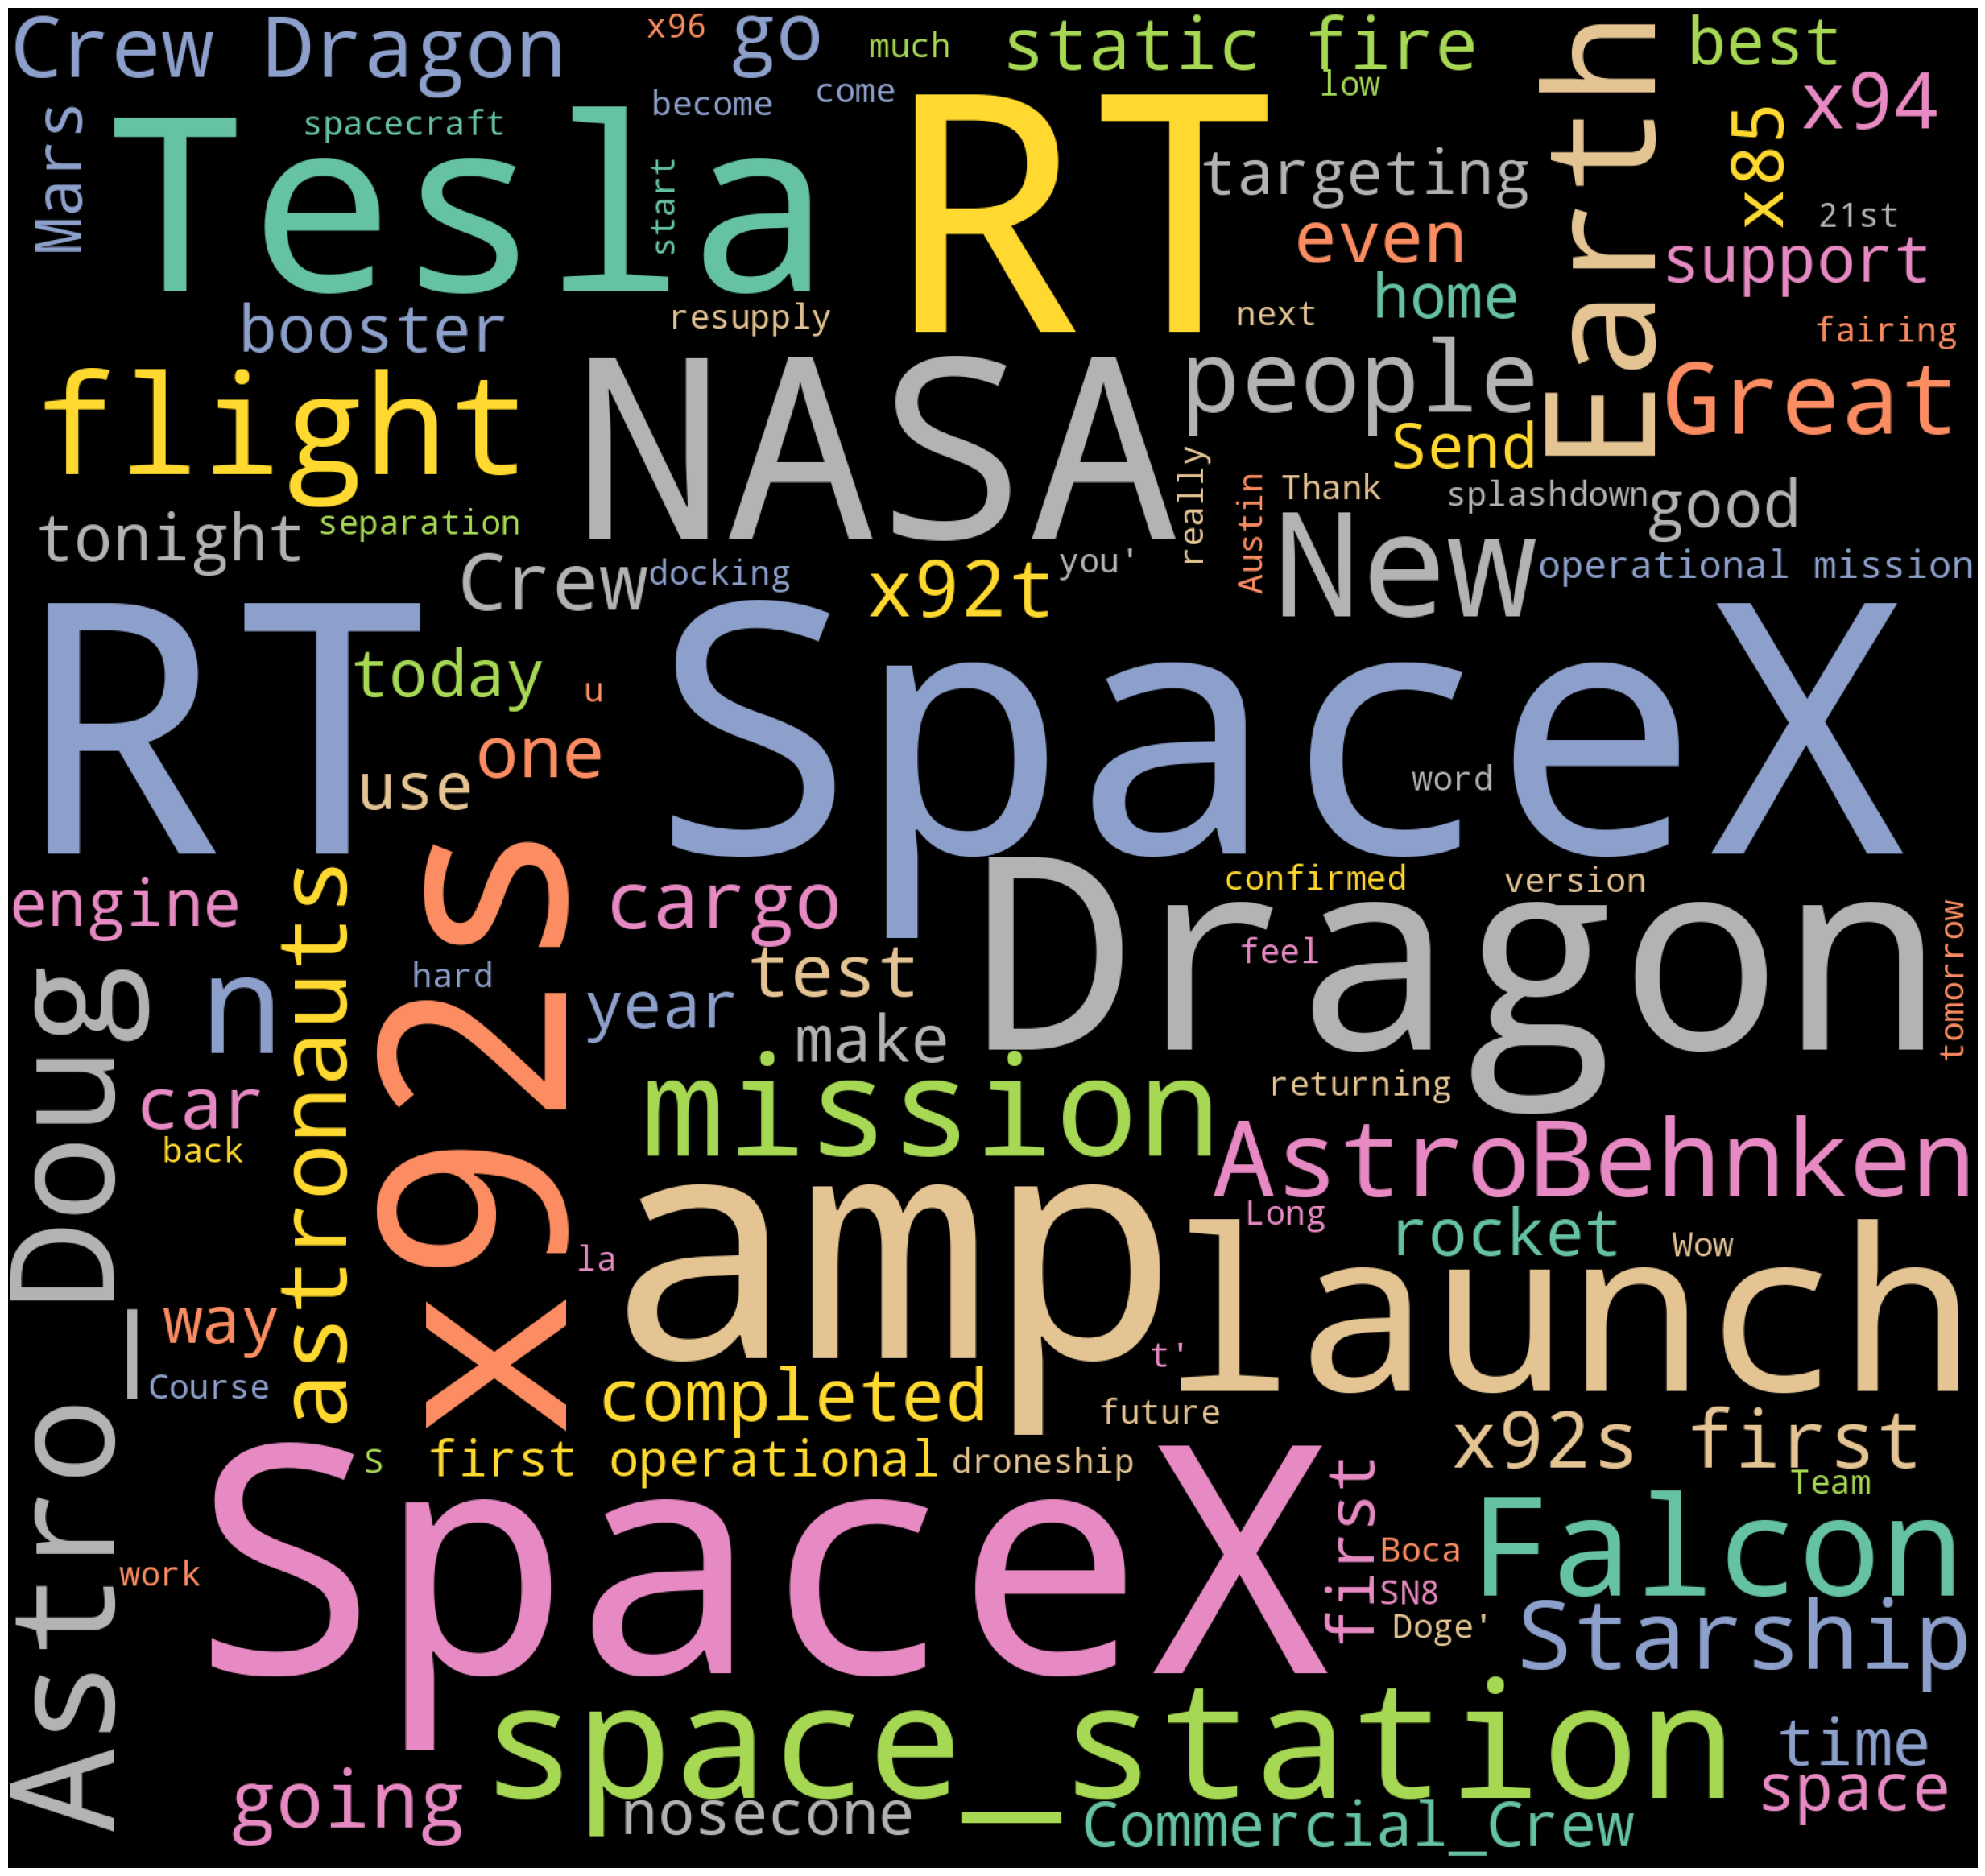

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width=1800, height=1700, background_color='black', max_words=100, colormap='Set2', stopwords=set(stopwords)).generate(str(musk))
# Plot
plot_cloud(wordcloud)

####Named Entity Recognition

In [ ]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = musk[0:10]   
text_list = [text for text in one_block]

# Process the texts using nlp.pipe()
docs = list(nlp.pipe(text_list)) #process the texts in a batch 

# Visualize the processed documents
spacy.displacy.render(docs, style='ent', jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
# Access part-of-speech tags for each token
for doc in docs:
    for token in doc:
        print(token.text, token.pos_)

The DET
most ADV
entertaining ADJ
outcome NOUN
is AUX
the DET
most ADV
likely ADJ
Just ADV
agree VERB
to PART
do VERB
Clubhouse PROPN
with ADP
@kanyewest X
Bought VERB
some DET
Dogecoin PROPN
for ADP
lil NOUN
X PROPN
, PUNCT
so SCONJ
he PRON
can AUX
be AUX
a DET
toddler NOUN
hodler NOUN
Back ADV
to ADP
work NOUN
I PRON
go VERB
Hodl ADV
the DET
rainforests NOUN
! PUNCT
! PUNCT
Lessons NOUN
learned VERB
Of ADP
Earth PROPN
and CCONJ
Mars PROPN
Time NOUN
to PART
tell VERB
the DET
story NOUN
of ADP
Tesla PROPN
& CCONJ
amp PROPN
; PUNCT
SpaceX PROPN
The DET
great ADJ
thing NOUN
about ADP
restaurants NOUN
is AUX
that SCONJ
you PRON
get VERB
to PART
hang VERB
out ADP
with ADP
strangers NOUN
! PUNCT
- PUNCT
SJM PROPN
The DET
future ADJ
currency NOUN
of ADP
Earth NOUN


In [ ]:
# Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['currency', 'Earth']


In [ ]:
# Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10] 

,word,count
0,currency,1
1,earth,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

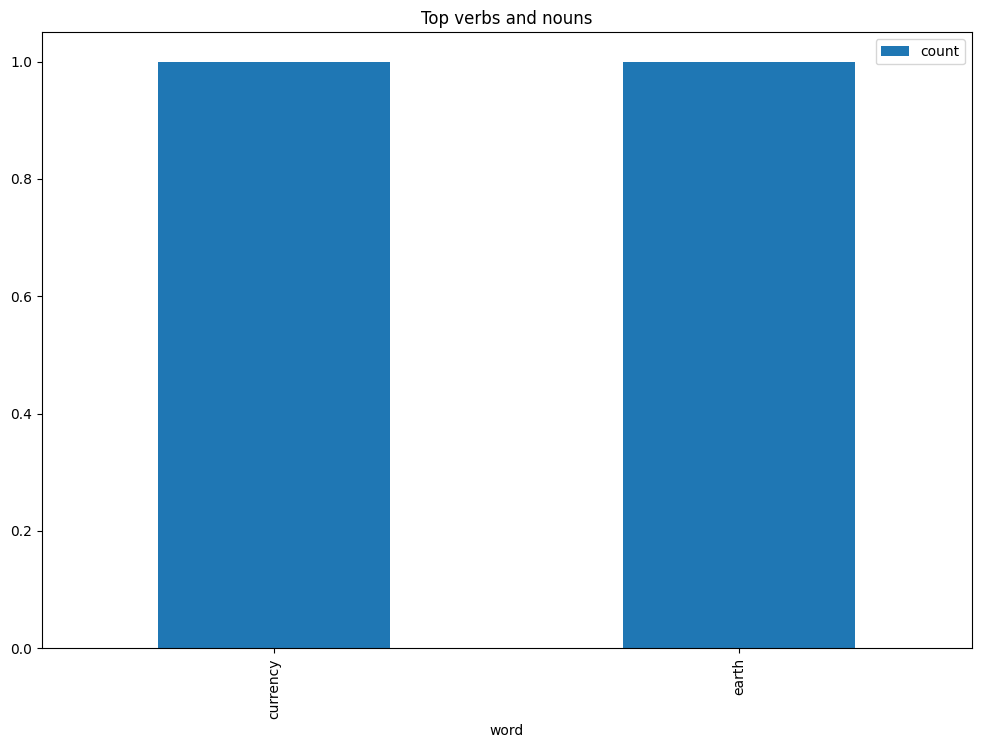

In [ ]:
# Visualizing results
# Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns') 

####Emotion Mining

In [ ]:
p_word = pd.read_csv('positive-words.txt', on_bad_lines='skip') #avoiding the warning about skipping lines with unexpected field counts
p_word.shape 

(2031, 1)

In [ ]:
n_word = pd.read_csv('negative-words.txt', on_bad_lines='skip' , encoding='latin-1')
n_word.shape

(4808, 1)

In [ ]:
p_word.head(7)

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
5,; This file and the papers can all be download...
6,; http://www.cs.uic.edu/~liub/FBS/sentiment...


In [ ]:
n_word.head(7)

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
5,; This file and the papers can all be download...
6,; http://www.cs.uic.edu/~liub/FBS/sentiment...


In [ ]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(musk))
sentences[6:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Legalize comedy My 14-year-old son, Saxon, said he feels like 2021 will be a good year.',
 'I agree.',
 'Let us all make it so.',
 'Btw, critical feedback is always super appreciated, as well as ways to donate money that really make a difference (way harder than it seems) Use Signal As seen from an external observer, not the participants The most entertaining outcome is the most likely Because of the large footprint, it may seem flat, but actually ranges up to 5 stories tall Ignore the heading Destiny, destiny\nNo escaping \nthat for me The Last Kingdom show is great Entertainment will be critical when cars drive themselves What should Tesla do with in-car gaming in an autonomous world?',
 'Try playing Polytopia in your Tesla!',
 'Great game.',
 'Multiplayer online version coming soon.',
 'To Tesla owners taking delivery in the final days of year, your support is super appreciated!!',
 'Thanks to everyone who worked so hard to make Tesla successful.',
 'My heart goes out to you.',
 '

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,The most entertaining outcome is the most like...
1,Lessons learned Of Earth and Mars Time to tell...
2,- SJM The future currency of Earth Much wow!
3,RT @SpaceX: Falcon 9 will launch @NASAs SPHER...
4,200mph top speed (with right tires).
...,...
91,"As a reminder, Im in *favor* of universal bas..."
92,Send in the memes Nothing has gaslit more pe...
93,This would solve a lot of brain/spine injuries...
94,"Thanks Just stop Wow, IHOP &amp; GitHub are cl..."


####For Positive Words 

In [ ]:
sentiment_words = p_word.iloc[:, 0].tolist()

nlp = spacy.load('en_core_web_sm')

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            lemma = word.lemma_.lower()
            if lemma in sentiment_words:
                sent_score += 1  # Increment the sentiment score by 1 for each matching word
    return sent_score

calculate_sentiment(text='wow')

1

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(20) 

0      36
1      29
2       9
3     153
4       6
5     124
6      16
7       2
8       6
9      95
10      6
11      2
12      5
13     16
14     11
15      6
16     21
17     12
18      6
19      4
Name: word_count, dtype: int64

In [ ]:
sent_df

,sentence,sentiment_value,word_count
0,The most entertaining outcome is the most like...,2,36
1,Lessons learned Of Earth and Mars Time to tell...,2,29
2,- SJM The future currency of Earth Much wow!,1,9
3,RT @SpaceX: Falcon 9 will launch @NASAs SPHER...,8,153
4,200mph top speed (with right tires).,2,6
...,...,...,...
91,"As a reminder, Im in *favor* of universal bas...",2,55
92,Send in the memes Nothing has gaslit more pe...,1,22
93,This would solve a lot of brain/spine injuries...,1,49
94,"Thanks Just stop Wow, IHOP &amp; GitHub are cl...",4,16


In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
87,Sure could use a good rave\nWhats your favori...,4,40
67,Support from government &amp; people is super ...,4,8
94,"Thanks Just stop Wow, IHOP &amp; GitHub are cl...",4,16
24,Autonomous docking tomorrow at approximately 1...,4,34
27,It was designed from the beginning with human ...,5,94
74,Tanks 4 the memery - panzer of the lake Plea...,6,92
5,First production car ever to achieve 0 to 60 m...,7,124
9,"Btw, critical feedback is always super appreci...",8,95
3,RT @SpaceX: Falcon 9 will launch @NASAs SPHER...,8,153
32,You cant stop playing Shakes fist at entropy ...,9,50


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    96.000000
mean      1.447917
std       1.902186
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       9.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
7,I agree.,0,2
8,Let us all make it so.,0,6
10,Try playing Polytopia in your Tesla!,0,6
12,Multiplayer online version coming soon.,0,5
15,My heart goes out to you.,0,6


In [ ]:
sent_df[sent_df['sentiment_value']>=8].head() 

,sentence,sentiment_value,word_count
3,RT @SpaceX: Falcon 9 will launch @NASAs SPHER...,8,153
9,"Btw, critical feedback is always super appreci...",8,95
32,You cant stop playing Shakes fist at entropy ...,9,50


In [ ]:
sent_df['index']=range(0,len(sent_df)) 

<ipython-input-47-6702561ade1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

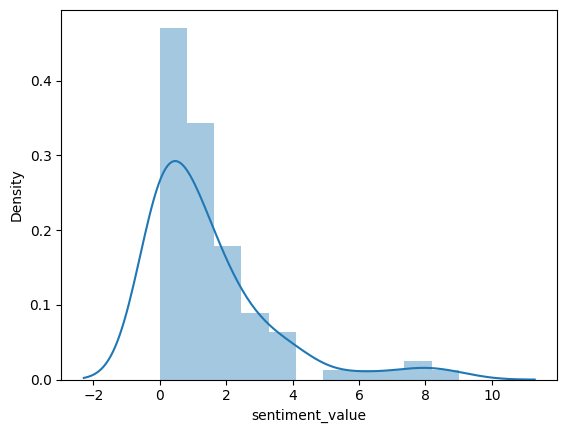

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<Axes: xlabel='index', ylabel='sentiment_value'>

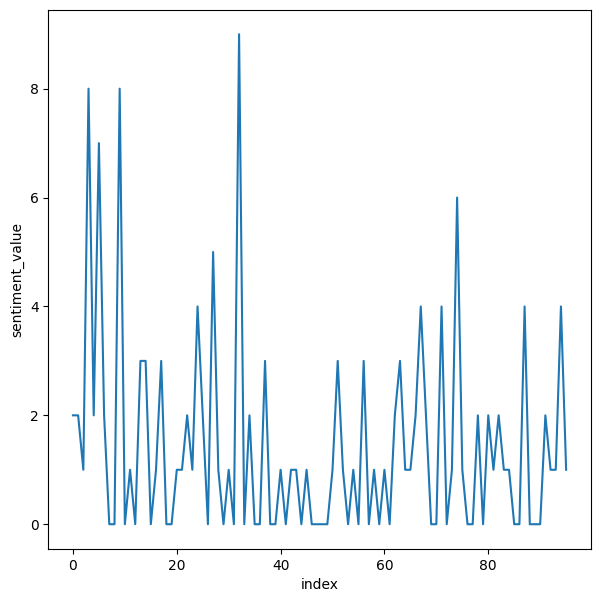

In [ ]:
plt.figure(figsize=(7, 7))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

####For Negative Words

In [ ]:
sentiment_words = n_word.iloc[:, 0].tolist()

nlp = spacy.load('en_core_web_sm')

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            lemma = word.lemma_.lower()
            if lemma in sentiment_words:
                sent_score += -1  # Increment the sentiment score by 1 for each matching word
    return sent_score

calculate_sentiment(text='ignore')

-1

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0     36
1     29
2      9
3    153
4      6
5    124
6     16
7      2
8      6
9     95
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count,index
45,RT @Tesla: There's no place like home..especia...,0,13,45
40,Several thousand more Starlink beta participat...,0,41,40
39,Send resume to 25Guns@Tesla.com.,0,4,39
38,Will interview in person tomorrow on site.,0,7,38
35,Want to find out?,0,4,35
33,I feel blessed.,0,3,33
30,You cant win\n2.,0,4,30
28,"Behind me is ""real"" #Dragon RT @michaelmina_la...",0,10,28
44,Proceeding with nosecone mate.,0,4,44
95,AI symbiosis while u wait Progress update Augu...,0,9,95


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    96.000000
mean     -0.854167
std       1.383962
min      -5.000000
25%      -1.000000
50%       0.000000
75%       0.000000
max       0.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count,index
0,The most entertaining outcome is the most like...,0,36,0
1,Lessons learned Of Earth and Mars Time to tell...,-3,29,1
2,- SJM The future currency of Earth Much wow!,0,9,2
3,RT @SpaceX: Falcon 9 will launch @NASAs SPHER...,-5,153,3
4,200mph top speed (with right tires).,0,6,4


In [ ]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-60-6702561ade1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

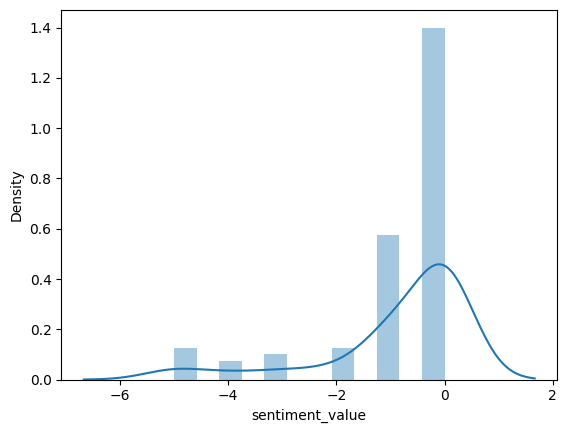

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<Axes: xlabel='index', ylabel='sentiment_value'>

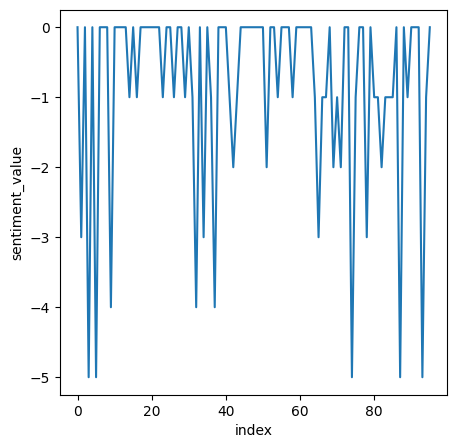

In [ ]:
plt.figure(figsize=(5, 5))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 